**Цель работы:**

Изучение связи между признаками двумерного набора данных, визуализация данных


# Загрузка набора данных

### Описание предметной области

Вариант №13

Набор данных clients2.csv

Атрибуты:
+ уникальный идентификатор клиента 
+ год рождения клиента
+ уровень образования клиента
+ семейное положение клиента
+ годовой доход семьи
+ количество детей
+ дата регистрации клиента в компании
+ количество покупок 


### 1.Чтение файла (набора данных)

1.1 В данной лабораторной работе необходимо загрузить и обработать датасет, а также выполнить задания по варианту с помощью библиотеки `pandas` в `Python`. Для начала была импортирована данная библиотека с помощью функции `import`, затем был загружен датасет `clients2.csv` c помощью метода `read_csv`

In [89]:
import pandas as pd 

df=pd.read_csv('/Users/denis/Downloads/clients2.csv', sep=';')

### 2. Обзор данных

2.1 Для первичного анализа датафрейма и проверки корректного импорта был использован метод `head()` c аргументом 20 для отображения первых 20 записей, благодаря чему была замечена ошибка импорта и добавлен параметр разделителя `sep` по точке с запятой в импорт

In [90]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
0,5524,1957,Graduation,Single,58138.0,0.0,04.09.2012,3.0
1,2174,1954,Graduation,Single,46344.0,1.0,08.03.2014,2.0
2,4141,1965,Graduation,Together,71613.0,0.0,21.08.2013,1.0
3,6182,1984,Graduation,Together,26646.0,1.0,10.02.2014,2.0
4,5324,1981,PhD,Married,58293.0,1.0,19.01.2014,5.0
5,7446,1967,Master,Together,62513.0,0.0,09.09.2013,2.0
6,965,1971,Graduation,Divorced,55635.0,0.0,13.11.2012,4.0
7,6177,1985,PhD,Married,33454.0,1.0,08.05.2013,2.0
8,4855,1974,PhD,Together,30351.0,1.0,06.06.2013,1.0
9,5899,1950,PhD,Together,5648.0,1.0,13.03.2014,1.0


Полученный датафрейм представляет собой журнал учета клиентов

Затем было необходимо проанализировать типы данных, так как даже при визуальном анализе видны ошибки (например, количество покупок имеет тип `float`), для этого был использован метод `info()`

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 796 non-null    int64  
 1   Year_Birth         796 non-null    int64  
 2   Education          796 non-null    object 
 3   Marital_Status     796 non-null    object 
 4   Income             784 non-null    float64
 5   Kidhome            795 non-null    float64
 6   Dt_Customer        795 non-null    object 
 7   NumDealsPurchases  795 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 49.9+ KB


2.3 Метод `.describe()` используется для получения статистического обзора данных, то есть подсчета, среднего, стандартного отклонения, максимального и минимального значение, квартериальных значений. 


In [92]:
description = df.describe()
display(description)

,ID,Year_Birth,Income,Kidhome,NumDealsPurchases
count,796.000000,796.000000,784.00000,795.000000,795.000000
mean,5630.133166,1968.356784,53130.07398,0.438994,2.314465
std,3273.039715,12.022132,21818.56876,0.547252,1.941650
min,0.000000,1899.000000,2447.00000,0.000000,0.000000
25%,2853.000000,1959.000000,36141.75000,0.000000,1.000000
50%,5563.000000,1969.500000,52372.50000,0.000000,2.000000
75%,8584.250000,1977.000000,69293.25000,1.000000,3.000000
max,11191.000000,1995.000000,162397.00000,2.000000,15.000000


### Выводы:

Минимальный год рождения клиента - 1899 (стоит обратить внимание при дальнейшей обработке), максимальный - 1995, это говорит, что учет ведется среди людей разных возрастов, медиана 1969 и среднее 1968 почти совпадают, то есть большинство людей родились в эти года.

Среднее по доходу - 53130, медиана - 52372, что говорит об отсутствии сильного перекоса, но разброс значений значительный - 21818, 75% значений дохода не приближаются даже к половине от максимального дохода в 162397.

Среднее по количеству детей - 0.4, медиана - 0, что говорит  о том, что большинство семей в датасете не имеют детей. Максимальное количество - 2, то есть многодетных семей в выборке тоже нет.

Среднее по количеству покупок - 2.3, а медиана - 2, то есть распределение покупок приближено к нормальному, 75% клиентов совершают до 3 покупок, но максимальное количество - 15, что является поводом для глубокого анализа таких семей.




 2.4 Оценка названий столбцов. 
 Предметной областью является журнал клиентов, который хранит  такую информацию, как:
+ уникальный идентификатор клиента 
+ год рождения клиента
+ уровень образования клиента
+ семейное положение клиента
+ годовой доход семьи
+ количестве детей
+ дата регистрации клиента в компании
+ количество покупок 

Все эти характеристики отображены в столбцах данного датасета. Чтобы показать все столбцы, используется функция `columns`

In [93]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Dt_Customer', 'NumDealsPurchases'],
      dtype='object')

2.5 Названия почти всех столбцов принято считать неудовлетворительными, так как они не отражают суть признака и не используют `snake_case`, для изменения названия столбцов был использован метод `rename()`

In [94]:
df=df.rename(columns={'ID':'id','Year_Birth':'birth_year','Education':'education',
                      'Marital_Status':'marital_status',
                      'Income':'income','Kidhome':'children_count',
                      'Dt_Customer':'reg_date',
                      'NumDealsPurchases':'purchases'})
df.columns

Index(['id', 'birth_year', 'education', 'marital_status', 'income',
       'children_count', 'reg_date', 'purchases'],
      dtype='object')

### 3. Проверка пропусков

3.1 Всего записей в этом датасете 796, но в столбцах `income`, `children_count`, `reg_date`, `purchases` наблюдаются меньше записей, так как там есть значения `NaN`. Чтобы вывести все записи, имеющие хотя бы одно нулевое значение, используется функция `.isnull()`. Функция `.any(axis=1)` указывает на поиск значений именно по строкам.

In [95]:
df_nan = df[df.isnull().any(axis=1)]
display(df_nan)



,id,birth_year,education,marital_status,income,children_count,reg_date,purchases
10,1994,1983,Graduation,MARRIED,NaN,NaN,NaN,NaN
26,5255,1986,Graduation,Single,NaN,1.0,20.02.2013,0.0
41,7281,1959,PhD,Single,NaN,0.0,05.11.2013,1.0
45,7244,1951,Graduation,Single,NaN,2.0,01.01.2014,3.0
55,8557,1982,Graduation,Single,NaN,1.0,17.06.2013,2.0
83,8996,1957,PhD,Married,NaN,2.0,19.11.2012,12.0
84,9235,1957,Graduation,Single,NaN,1.0,27.05.2014,1.0
85,5798,1973,Master,Together,NaN,0.0,23.11.2013,1.0
116,8268,1961,PhD,Married,NaN,0.0,11.07.2013,3.0
121,1295,1963,Graduation,Married,NaN,0.0,11.08.2013,1.0


3.2 Было принято решение удалить все записи, содержащие в себе хотя бы одно значение `NaN`, так как в дальнейшем отсутствие помешает расчетам и может привести к ошибкам при смене типов данных. За удаление строк с нулевыми значениями отвечает функция `.dropna()`. После этого была проведена проверка нулевых значений в столбцах с помощью метода `.isna()`,а метод `.sum()` показывает сумму таких значений. В результате нулевые значения отсутствуют

In [96]:
display(len(df_nan))
df = df.dropna()
df.isna().sum()
display(len(df))

12

784

3.3 Соответственно было исключено 12 записей из 796, что составляет 2% от изначального датасета

### 4. Проверка дубликатов

#### Проверка явных дубликатов

4.1 Нужно проверить датафрейм на наличие дубликатов, для этого используется метод `duplictated()`, также чтобы узнать количество дубликатов используется метод `sum()`

In [131]:
display(df.duplicated().sum())

0

4.2 Всего получилось 4 дубликата, которые необходимо удалить с помощью метода `drop_dublicates()`, а метод `reset_index` c параметром `drop=True` избавят от пропусков и не создаст столбец `index`

In [98]:
df = df.drop_duplicates().reset_index(drop=True)
df.head()

,id,birth_year,education,marital_status,income,children_count,reg_date,purchases
0,5524,1957,Graduation,Single,58138.0,0.0,04.09.2012,3.0
1,2174,1954,Graduation,Single,46344.0,1.0,08.03.2014,2.0
2,4141,1965,Graduation,Together,71613.0,0.0,21.08.2013,1.0
3,6182,1984,Graduation,Together,26646.0,1.0,10.02.2014,2.0
4,5324,1981,PhD,Married,58293.0,1.0,19.01.2014,5.0


#### Проверка неявных дубликатов

4.3 Затем были проверены столбцы `education` и `martital_status` на наличие записей с одинаковыми значениями, но разные по написанию (регистр или синоним) с помощью функции `.unique()`

In [99]:
display(df['education'].unique())

df['marital_status'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

array(['Single', 'Together', 'Married', 'Divorced', 'SINGL', 'MARRIED',
       'Widow', 'Alone'], dtype=object)

В столбце `education` нет каких-либо дублирующихся значений, однако в столбце `marital_status` есть значения `SINGL` и `Alone`, которые дублируют `Single`, и `MARRIED`, дублирующий `Married`. Приведение записей с такими значениями в нормальный вид можно сделать с помощью функции `.replace()`

In [130]:
dubles = ['SINGL','Alone']
df['marital_status'] = df['marital_status'].replace(dubles,'Single')
df['marital_status'] = df['marital_status'].replace('MARRIED','Married')
display(df['marital_status'].unique())

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

### 5. Провека типов данных

5.1 Теперь необходимо изменить типы данных некоторых столбцов. Вывод функции `.info()` показал типы данных в столбцах. Столбцы `children_count` и `purchases` имеют тип `float`, однако значения в данных столбцах могут быть только целочисленными, поэтому необходимо задать данным столбцам тип данных `int` с помощью функции `.astype()`



Также было решено изменить тип данных столбца `release_year`, сейчас он имеет тип `float`, а теперь он будет иметь тип `int`, что тоже не совсем корректно, но так как отсутствуют значения месяца и дня, то этого будет достаточно

Также столбец `reg_date` имеет тип данных `object`, но так как это столбец с датой, то данному столбцу необходимо присвоить тип данных `datetime` для правильного отображения с помощью функции `pd.to_datetime()` и задать формат дд.мм.гг.


In [102]:
df['children_count'] = df['children_count'].astype(int)
df['purchases'] = df['purchases'].astype(int)
df['reg_date'] = pd.to_datetime(df['reg_date'], format='%d.%m.%Y')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 0 to 779
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               779 non-null    int64         
 1   birth_year       779 non-null    int64         
 2   education        779 non-null    object        
 3   marital_status   779 non-null    object        
 4   income           779 non-null    float64       
 5   children_count   779 non-null    int64         
 6   reg_date         779 non-null    datetime64[ns]
 7   purchases        779 non-null    int64         
 8   income_category  779 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 60.9+ KB


5.2 После корректировки и проверки данных таблицы было произведено выполнение вузализации

### 6. Визуализация данных

6.1 Как можно заметить, в датасете лишь столбцы `education` и `martital_status` имеют тип `object`, столбец `reg_date` имеет тип `datetime`, остальные столбцы - числовые.

Необходимо построить матрицу диаграмм рассеяния, это будет сделано с помощью библиотеки `seaborn` и метода `pairplot`, стобец `id` был исключен из визуализации

In [103]:
import seaborn as sns

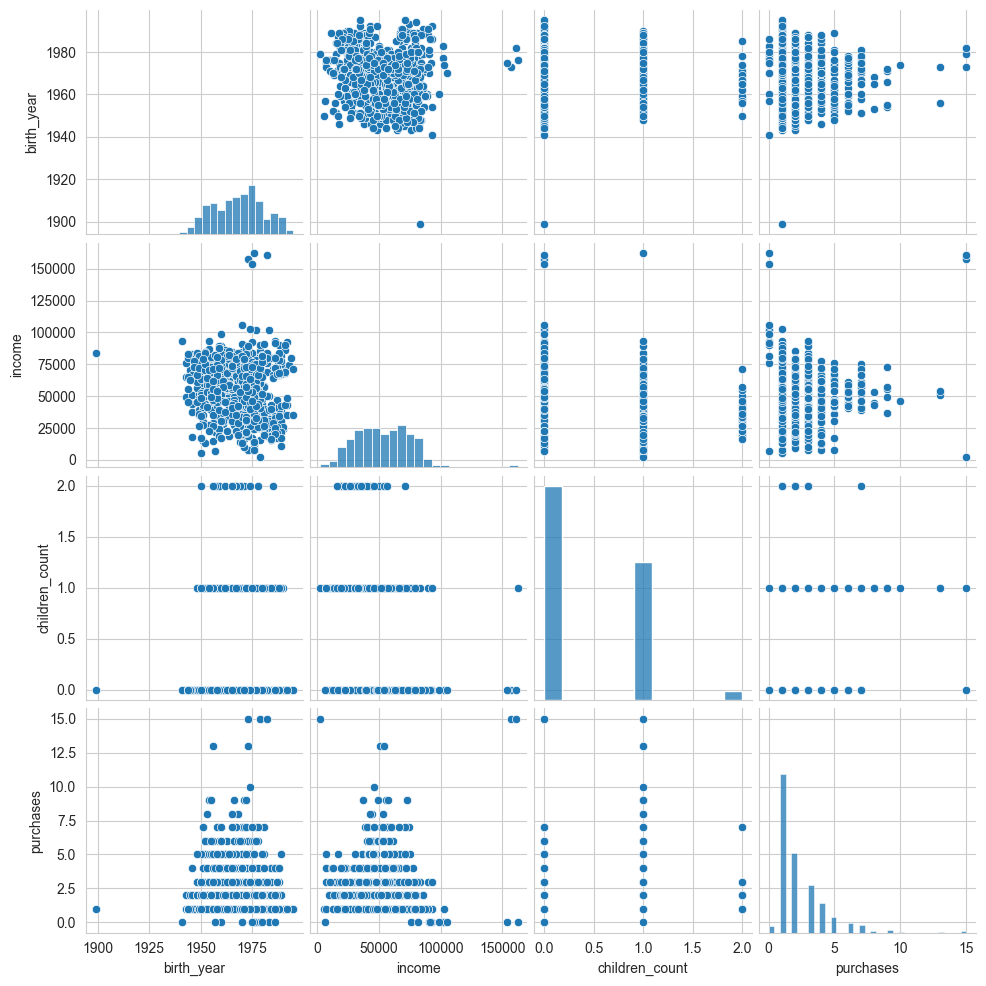

In [104]:
df_pairplot=df.drop('id',axis=1)

sns.pairplot(df_pairplot)

6.2 Взаимосвязь между `birth_year` и `income`: 

На диаграмме видно, что значительная часть клиентов рождена в период 1940–1980, но чёткой зависимости нет.

Взаимосвязь между `birth_year` и `сhildren_count`:

На диаграмме видно слабую положительную, то есть чем моложе клиент, тем меньше у детей, что и логично, так как у более молодых клиентов реже встречаются дети, чем у взрослых

Взаимосвязь между `birth_year` и `purchases`:

Молодые клиенты немного чаще совершают больше покупок,
но общая картина остаётся слабо выраженной

Взаимосвязь между `children count` и `income`: 

При двух детях в семье снижается уровень дохода, а между 0 и 1 ребенком нет сильной разницы, зависимость не наблюдается 

Взаимосвязь между `purchases` и `income`: 

Наблюдаетя слабая положительная зависимость, так при сдвиге вправо верхняя граница немного сдвигается вверх 

Взаимосвязь между `children_count` и `purchases`: 

Зависимость отсутствует, но клиенты с 2 детьми покупали меньше товаров


6.3 Далее рассматривается диаграмма рассеяния зарплаты от года рождения по каждому уровню образования, для это добавляется параметр `hue`

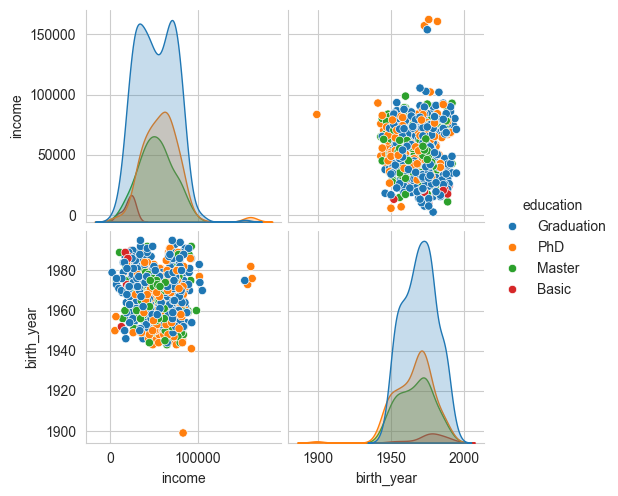

In [105]:
sns.pairplot(df[['income', 'birth_year','education']], hue='education')

6.4 На основе визуализации видна слабая положительная зависимость между доходом и годом рождения

Более молодые поколения (правый край графика) в среднем имеют несколько более высокие доходы
Однако зависимость не сильная - точки значительно разбросаны, что говорит о том, что год рождения не является определяющим фактором дохода

Данные сгруппированы по 4 уровням образования: Graduation, PhD, Master, Basic
PhD и Master демонстрируют более высокие медианные доходы по сравнению с Basic
Выпускники (Graduation) занимают промежуточное положение

6.5 Далее необходимо построить гистограмму для каждого числового столбца (было решено исключить id, так как ничего интересного там нет), для этого будет использован метод  `histplot` из модуля `seaborn` с параметром `bins=auto` для автоматического определения интервалов построения, также для удобства добавления подписи была импортирована библиотека `matplotlib.pyplot` и использован метод `title`


In [106]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Гистограмма года рождения')

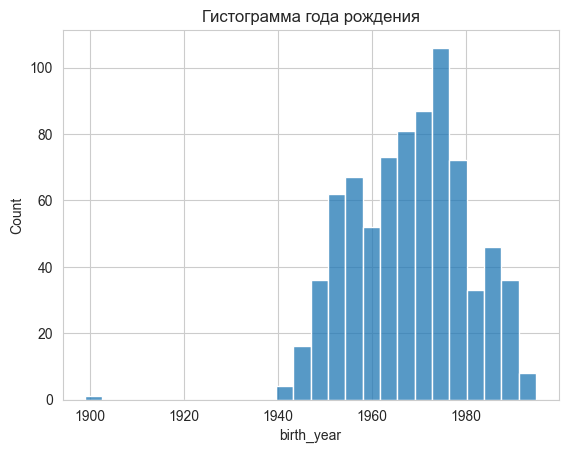

In [107]:
sns.histplot(df['birth_year'],bins='auto')

plt.title('Гистограмма года рождения')


6.6 Из гистограммы видно, что есть явный выброс в 1899, стоит от него избавиться.

Распределение неравномерное, с ярко выраженным максимумом в 1960-1975

Основная аудитория - люди среднего и старшего возраста.

Text(0.5, 1.0, 'Гистограмма года рождения без выброса')

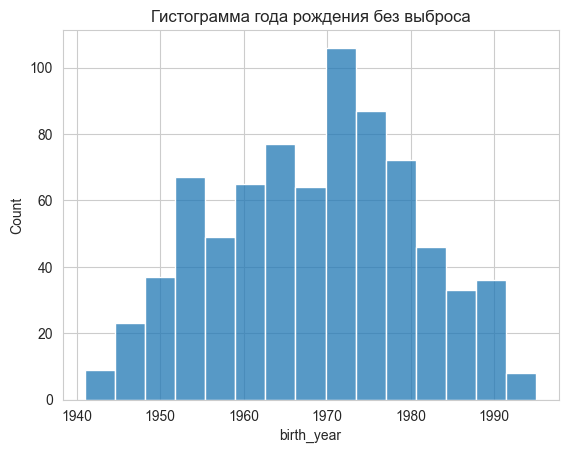

In [108]:
df = df[df['birth_year'] != 1899]
sns.histplot(df['birth_year'],bins='auto')

plt.title('Гистограмма года рождения без выброса')

6.7 После избавления от выброса можно точнее удостовериться в достаточно нормальном распределении года рождения, что говорит о том, что в выборке значения сосредоточены вокруг медианного значения

6.8 Далее аналогично была построена гистограмма дохода

Text(0.5, 1.0, 'Гистограмма дохода')

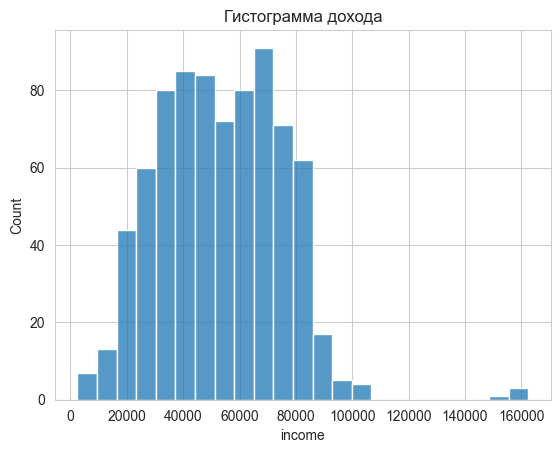

In [109]:
sns.histplot(df['income'],bins='auto')

plt.title('Гистограмма дохода')


6.9 Гистограмма дохода подтверждает выбросы в значениях около 160000, значения количества клиентов с близким друг другу доходом больше, чем значений возраста

6.10 Затем строится гистограмма количества дететей в семье

Text(0.5, 1.0, 'Гистограмма количества детей')

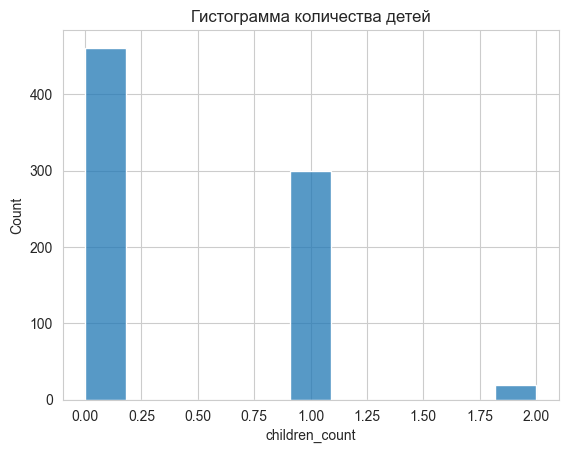

In [132]:
sns.histplot(df['children_count'],bins='auto')

plt.title('Гистограмма количества детей')

6.11 Гистограмма количества детей доказывает, что в выборке больше всего клиентов без детей, далее по количеству идут клиенты с 1 ребенком, а клиентов с 2 детьми совсем мало, стоит обратить на это во время поиска корреляции, так как максимальное значение детей в семье и так мало (2), так еще и самих таких значений достаточно мало

6.12 Далее строится гистограмма покупок

Text(0.5, 1.0, 'Гистограмма покупок')

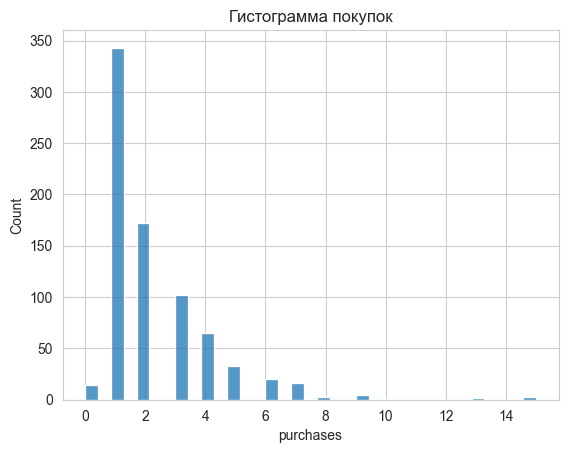

In [111]:
sns.histplot(df['purchases'],bins='auto')

plt.title('Гистограмма покупок')

6.13 Большинство клиентов совершают мало покупок - основная масса данных сосредоточена в диапазоне от 0 до 3

По мере увеличения количества покупок наблюдается резкое снижение частоты:
клиентов с 4 и более покупками значительно меньше.
Небольшое количество наблюдений (единичные случаи) встречается при значениях выше 10,
что можно считать редкими, но очень активными покупателями.

6.14 Была составлена матрица ковариаций с помощью метода `cov()`. Ковариация показывает, как переменные взаимодействуют друг с другом. Например, если ковариация положительная, переменные имеют тенденцию расти вместе, если отрицательная — одна переменная увеличивается, когда другая уменьшается.

In [112]:
covar=df_pairplot.cov(numeric_only=True)
display(covar)

,birth_year,income,children_count,purchases
birth_year,144.370197,-3.781839e+04,1.682306,-1.230145
income,-37818.386778,4.784848e+08,-6365.870771,-2291.470712
children_count,1.682306,-6.365871e+03,0.294478,0.191111
purchases,-1.230145,-2.291471e+03,0.191111,3.684900


6.15 Наиболее сильная связь наблюдается между возрастом и доходом, а также между доходом и количеством детей — обе эти зависимости отрицательные.
Это говорит о том, что более молодые клиенты зарабатывают меньше, а также клиенты имеют больший доход, если у них меньше детей.

6.16 Далее была выведена таблица корреляции всех числовых столбцов с помощью метода `df.corr()`. Корреляция показывает уровень зависимости числовых столбцов друг от друга.

In [113]:
corr=df_pairplot.corr(numeric_only=True)
display(corr)

,birth_year,income,children_count,purchases
birth_year,1.000000,-0.143890,0.258012,-0.053334
income,-0.143890,1.000000,-0.536287,-0.054572
children_count,0.258012,-0.536287,1.000000,0.183462
purchases,-0.053334,-0.054572,0.183462,1.000000


6.17 По данной таблице можно понять, что взаимосвязь столбцов друг с другом практически нулевая, то есть корреляция между ними не наблюдается, кроме столбцов количества детей и дохода, так как там умеренная отрицательная корреляция. Также была построена диаграмма `heatmap`, которая показывает уровень корреляции между столбцами графически с помощью метода `heatmap` библиотеки `seaborn`, сокращённо `sns`.

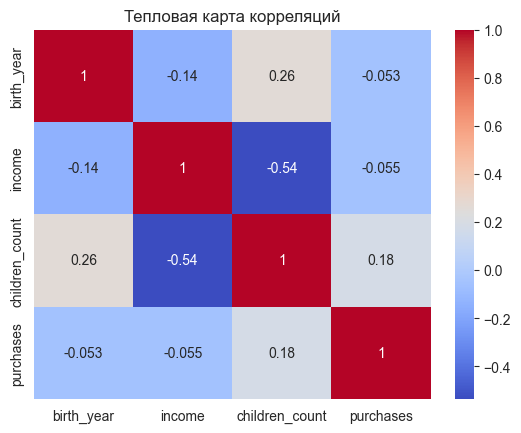

In [114]:
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.show()

### 7. Выполнение индивидуальных заданий

#### Задание 1

Использовать seaborn.
По группировке - тип образования и количество клиентов по каждому семейному статусу 



7.1  Группировка происходит с помощью метода `groupby()`, необходимо сгруппировать данные по столбцам `education` и `marital_status`, вывести количество записей, соответствующее группировке, выведя только столбец `id` c методом `count()`

In [115]:
un = df.groupby(['education','marital_status'])
df_hist = un['id'].count()
hist = pd.DataFrame(df_hist)
display(hist)

id
education  marital_status     
Basic      Divorced          1
           Married           9
           Single            1
           Together          4
Graduation Divorced         49
           Married         168
           Single           98
           Together         96
           Widow            21
Master     Divorced         12
           Married          57
           Single           32
           Together         41
           Widow             4
PhD        Divorced         23
           Married          68
           Single           41
           Together         50
           Widow             4

7.2 Из получившейся таблицы можно сделать гистограмму. Создаётся гистограмма с помощью метода `histplot` библиотеки `seaborn`. Данный метод имеет множество параметров, были использованы параметры `data` - данные, по которой будет создаваться гистограмма, `x` - что будет находиться на оси абсциссы, `weights` - по какому значению будет строиться гистограмма, `hue` - какие значения будут окрашиваться в разные цвета, `multiple` - параметр, отвечающий за расположение различных показателей, `kde` - линия тренда, принимает бинарное значение.

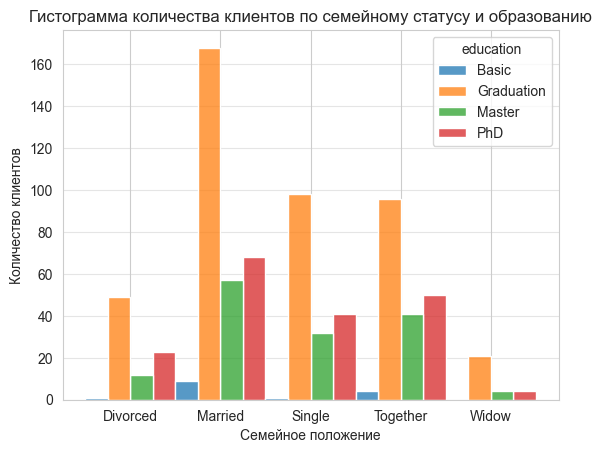

In [133]:
sns.histplot(data=hist, x='marital_status',weights='id',hue='education',kde=False, multiple='dodge')

plt.xlabel('Семейное положение')
plt.ylabel('Количество клиентов')
plt.title('Гистограмма количества клиентов по семейному статусу и образованию')
plt.grid(True, axis='y', alpha=0.5, linestyle='-', linewidth=0.8)

7.3 Наибольшая группа клиентов - женатые/замужние (Married)

Среди них доминирует образование уровня Graduation (высшее образование) - таких клиентов больше всего во всей выборке

Вторая по численности категория - Single (не состоящие в браке)

Здесь также преобладают клиенты с высшим образованием,
но доля обладателей степеней Master и PhD заметно выше, чем у Married

Категория Together (в отношениях, но не женаты) примерно равна по численности категории Single,
структура образования аналогична - преобладает Graduation, за ним Master и PhD

Среди Divorced (разведённых) и Widow (вдов/вдовцов) клиентов меньше,
но в этих группах наблюдается высокая доля людей с учёными степенями (Master, PhD)

Это может говорить о том, что более образованные клиенты чаще встречаются в старших возрастных категориях

#### Задание 2

7.4 Использовать pandas и plot.
По сводной таблице (pivot_table) - отобразить средний доход семьи по семейному положению.
Отобразить маркеры в виде
★
розового (deeppink
)
цвета размером 20.

7.5 Была создана сводная таблица с помощью метода `pivot_table()`

In [134]:
pivot_mean=df.pivot_table(values='income', index='marital_status',aggfunc='mean')
pivot_mean=pivot_mean.reset_index()
display(pivot_mean)

,marital_status,income
0,Divorced,54568.164706
1,Married,52898.344371
2,Single,50934.034884
3,Together,54350.853403
4,Widow,55452.448276


7.6 Далее была создана диаграмма рассеяния по данной таблице с помощью метода `plot` библиотеки `pandas`. На вход были приняты такие параметры как столбцы `income` и `education`, вид диаграммы `scatter` и изменение размера и цвета точек на диаграмме, размер `s` точек 20, а цвет `c` - deeppink, маркер отображение - звезда

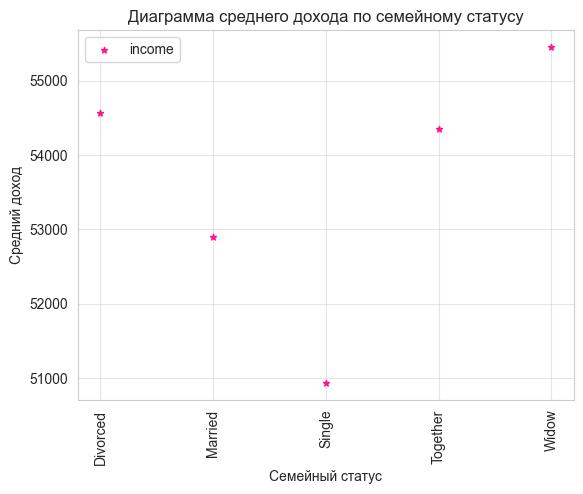

In [135]:
scttr=pivot_mean.plot(x='marital_status',y='income',kind='scatter',s=20,c=['deeppink'],marker='*',label='income')
plt.title('Диаграмма среднего дохода по семейному статусу')
plt.xlabel('Семейный статус')
plt.ylabel('Средний доход')
plt.grid(True, axis='both', alpha=0.5, linestyle='-', linewidth=0.8)
plt.xticks(rotation=90)
plt.show()


7.7 Самые большие доходы у вдов/вдовцов, возможно это связано с тем, что после потери близкого человека, люди нагружают себя больше работой, чтобы избавиться от финансовой потери со стороны партнера

На основании диаграммы среднего дохода по семейному статусу, можно сделать вывод, что в среднем у семей в разводе доходы достаточно большие, чем у остальных, возможно, это связано с тем, что некоторая часть людей после развода начинает больше уделять времени себе, хобби, работе, бизнесу и т.д., например, чтобы избежать финансовой зависимости от партнера в следующих отношениях


Самый маленький средний доход у одиноких людей, что тоже логично, так как у человека есть необходимость содержать только себя, а не себя + партнера, что довольно-таки часто происходит в отношениях

Тяжело выявить явную закономерность, то есть семейный статус не сильно влияет на доход


#### Задание 3

7.9 Использовать matplotlib.
Отфильтровать клиентов по количеству детей больше 0. Построить круговую диаграмму, которая отображает процент клиентов определенного уровня образования
.

7.10 Для того, чтобы создать круговую диаграмму, датасет был отсортирован по количеству детей больше 0. Была создана диаграмма с помощью метода `pie` библиотеки `matplotlib`. В параметрах были занесены столбцы, по которым будет создаваться диаграмма, а также отображение процентного соотношения

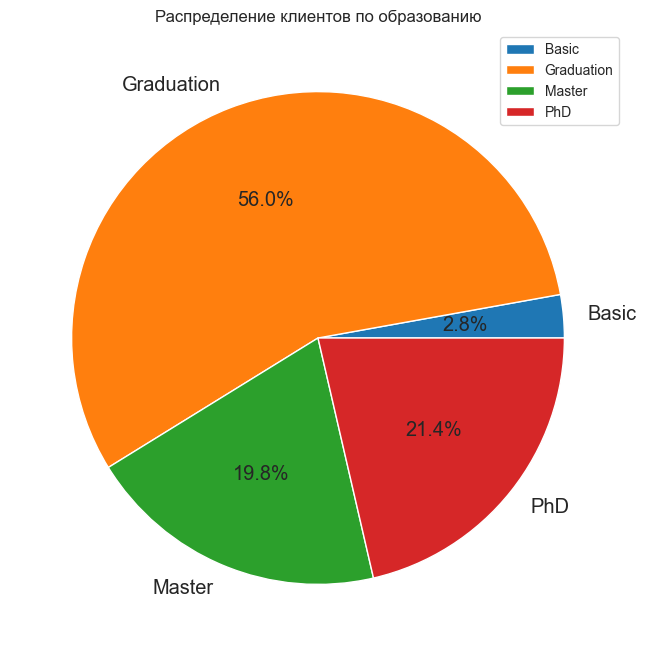

In [119]:
df_filter = df.query('children_count > 0')
filter_pivot = df_filter.pivot_table(values='id', index='education', aggfunc="count")
filter_pivot = filter_pivot.reset_index()
plt.figure(figsize=(20,8))
plt.pie(filter_pivot['id'],labels=filter_pivot['education'],autopct='%1.1f%%', textprops={'size': 'x-large'},)
plt.title('Распределение клиентов по образованию')
plt.legend(bbox_to_anchor=(1, 1))



7.11 На основании диаграммы можно сделать вывод, что больше половины клиентов имеют высшее образование (бакалавриват), то есть самая распространненая группа людей в жизни, далее идут люди с докторской степенью, достаточно большой показатель подчеркивает высокий образовательный уровень клиентской базы, возможно, это какой-то специализированный магазин, высокая доля магистров после также показывает достаточно большой образовательный уровень клиентской базы, это же и подчеркивает низкий процент людей с базовым уровнем образования (2.8%)

### 8. Продвинутая визуализация 

8.1 Далее необходимо выполнить визуализацию `hexagonal binning plot`
– «график, поделённый на шестиугольные области», в котором график делится на ячейки, которые заливаются цветом – чем больше точек попало в область, тем цвет гуще. Таким образом, этот график отображает частотность двух величин.

Text(0.5, 1.0, 'Зависимость покупок от дохода')

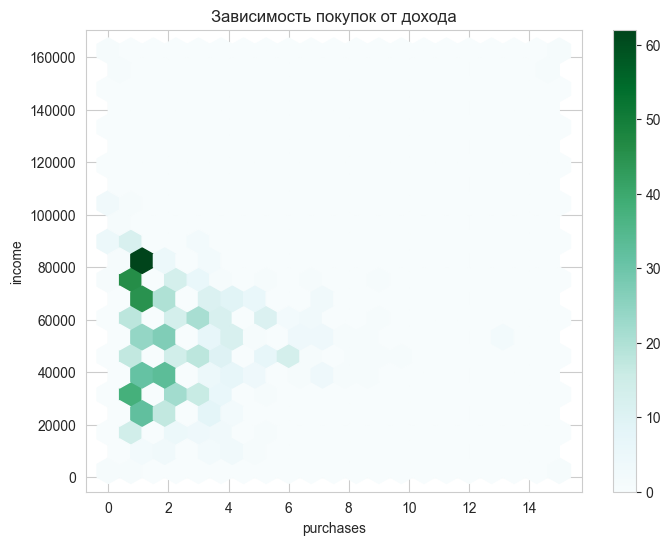

In [120]:
df.plot(x='purchases', y='income', kind='hexbin', gridsize=20, figsize=(8, 6))
plt.title("Зависимость покупок от дохода")

8.2 На основании этой диаграммы можно заметить отрицательную зависимость, так как чем больше покупок совершал человек, тем менее яркий цвет шестиугольника, но на основани гистограммы покупок можно было заметить, что больше 10 покупок практически никто не совершал, так что нельзя говорить о сильной зависимости из-за малого количества примеров

8.3 Далее необходимо построить `boxplot` - график "ящик с усами" с помощью `pandas`

Text(0.5, 1.0, 'Boxplot дохода')

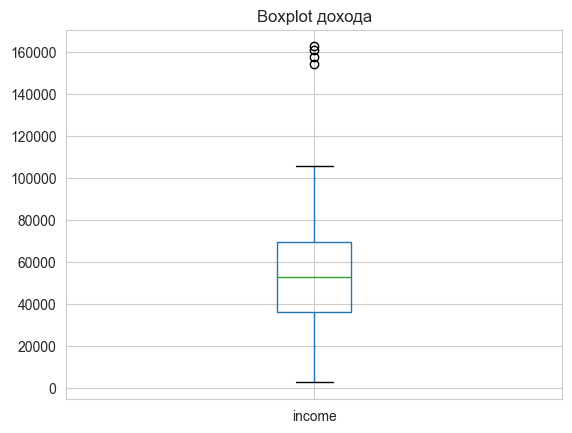

In [121]:
df.boxplot(column='income')
plt.title("Boxplot дохода")

8.4 Этот график показывает статистические величины: минимум - нижний "усик", нижний квартиль - нижнее основание прямоугольника, медиана - линиия внутри прямоугольника, верхний квартиль - верхнее основание прямоугольника, максимум - верхний "усик" и выброса - точки выше "усика"

8.5 Для того, чтобы выделить категории дохода: низкий, средний, высокий, ипсользуется метод `describe`

In [122]:
df.describe()

,id,birth_year,income,children_count,reg_date,purchases
count,779.000000,779.000000,779.000000,779.000000,779,779.000000
mean,5648.011553,1968.372272,53098.051348,0.432606,2013-07-04 05:25:20.410782976,2.310655
min,0.000000,1941.000000,2447.000000,0.000000,2012-08-01 00:00:00,0.000000
25%,2884.000000,1959.000000,36042.000000,0.000000,2013-01-10 00:00:00,1.000000
50%,5585.000000,1969.000000,52614.000000,0.000000,2013-06-21 00:00:00,2.000000
75%,8598.000000,1976.500000,69319.500000,1.000000,2013-12-20 12:00:00,3.000000
max,11191.000000,1995.000000,162397.000000,2.000000,2014-06-29 00:00:00,15.000000
std,3280.048153,11.763416,21861.170589,0.542786,NaN,1.920269


8.6 На основании квартериальных значений, были выделены следующие категории:

1. Низкий - меньше 36042
2. Средний - между 36042 и 69319
3. Высокий - больше 69319

Далее написана фунеция категоризации

In [123]:
def categorize(df):
    income = df['income']
    if income <= 36042:
        return 'низкий'
    elif 36042 < income <= 69319:
        return 'средний'
    else:
        return 'высокий'

8.7 Далее был создан новый столбец и к нему применен метод `apply`

In [124]:
df['income_category']=df['income']

In [125]:
df['income_category']=df.apply(categorize, axis=1)

8.8 Затем создаются boxplot'ы с помощью библиотеки `seaborn` по категориям, выделенным раньше

/var/folders/49/mtwrx3c95k9833d2rmbhlm940000gn/T/ipykernel_38819/4259857915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income_category', y='income',


Text(0.5, 1.0, "Boxplot'ы категорий дохода")

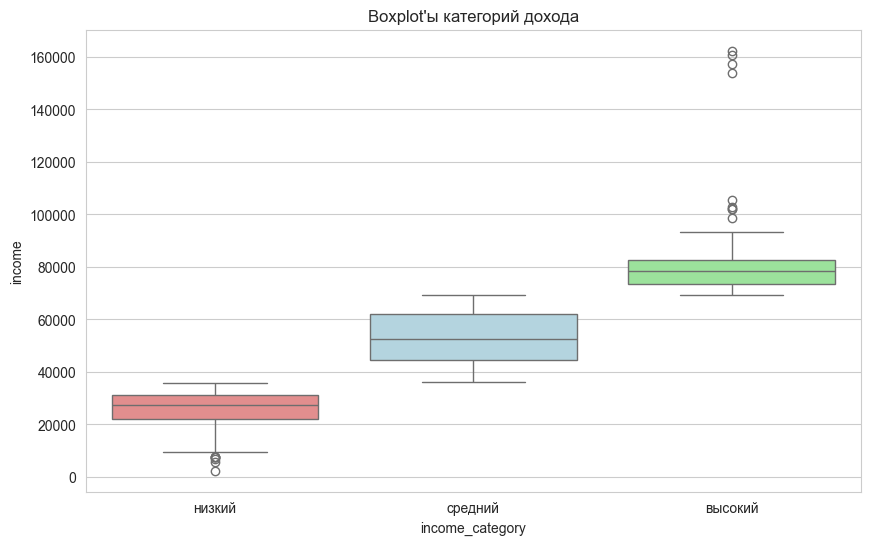

In [137]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(data=df, x='income_category', y='income', 
            order=['низкий', 'средний', 'высокий'],
            palette=['lightcoral', 'lightblue', 'lightgreen'])
plt.title("Boxplot'ы категорий дохода")


8.9 Далее были созданы еще boxplot'ы с помощью библиотек matplotlib и seaborn, оба распределения указаны на одном графике с помощью метода `subplots`

/var/folders/49/mtwrx3c95k9833d2rmbhlm940000gn/T/ipykernel_38819/479547795.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(marital_data, labels=df['marital_status'].unique())
/var/folders/49/mtwrx3c95k9833d2rmbhlm940000gn/T/ipykernel_38819/479547795.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='education', y='income', ax=ax2, palette='Set3')


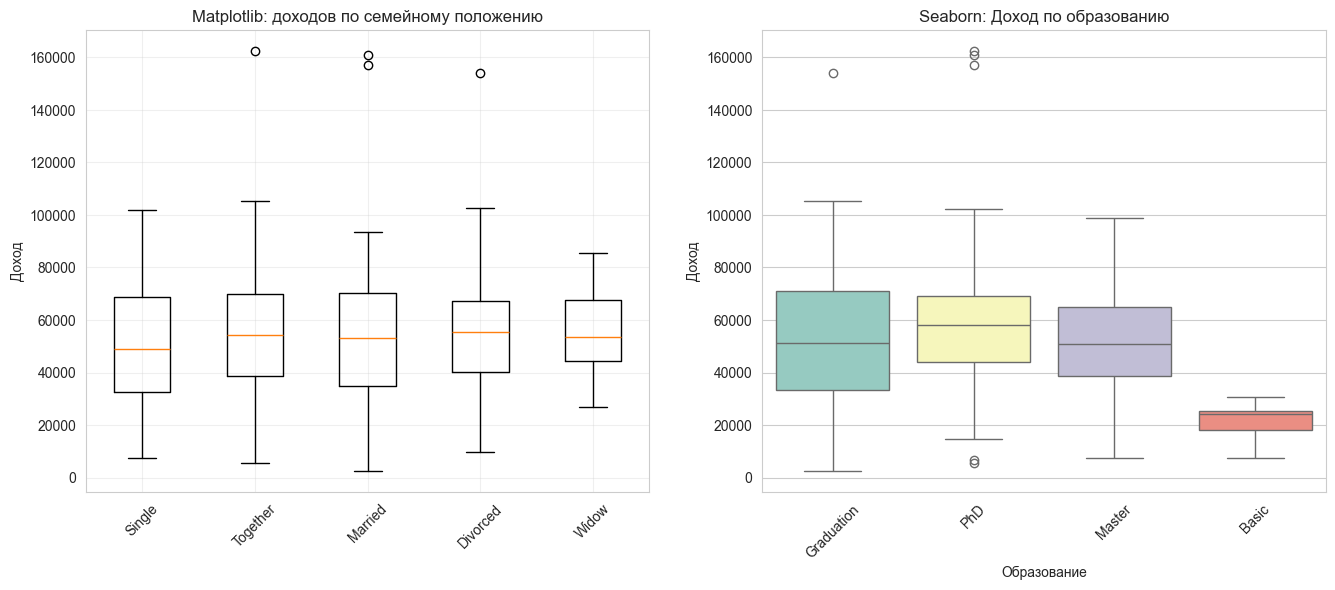

In [138]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
marital_data = [df[df['marital_status'] == status]['income'] 
                for status in df['marital_status'].unique()]
ax1.boxplot(marital_data, labels=df['marital_status'].unique())
ax1.set_title('Matplotlib: доходов по семейному положению')
ax1.set_ylabel('Доход')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)
sns.boxplot(data=df, x='education', y='income', ax=ax2, palette='Set3')
ax2.set_title('Seaborn: Доход по образованию')
ax2.set_xlabel('Образование')
ax2.set_ylabel('Доход')
ax2.tick_params(axis='x', rotation=45)

8.10 Из первого распределения можно сделать вывод, что выбросы почти отсутствуют, а также изображены все статистические величины на 1 графике для дохода по семейному статусу. На втором графике изображено распределение  дохода по уровню образования, выбросов почти нет, но у доходов людей с докторской степенью есть выбросы с обеих сторон, также все статистические  величины  отображены на этом графике

### Вывод

В рамках лабораторной работы был проведен анализ данных с построением различных видов визуализаций: гистограмм, диаграмм рассеяния, тепловых карт и круговых диаграмм. Для создания графиков использовались библиотеки pandas, matplotlib и seaborn. Дополнительно были вычислены показатели корреляции и ковариации между переменными.

Анализ взаимосвязей в данных показал, что большинство переменных демонстрируют слабую корреляцию. Наиболее значимой оказалась зависимость между доходом и количеством детей - наблюдается обратная зависимость, где меньшее количество детей соответствует более высокому уровню дохода. Также коэффициент ковариации выявил сильную отрицательную связь между доходом и годом рождения.

Были найдены выбросы и удалены (год рождения слишком давний)

Трудности при выполнении работы заключались в том, что некоторые данные в датасете не дает понять полностью зависимость двух переменных, отчего можно строить лишь теории.

Также анализ дал понять, что предметная область связана с какой-либо учебной  деятельностью так как большинство людей имеют высокий уровень образования

К сожалению, найти каких-то сильных закономерностей в датасете неудалось, скорее всего, это из-за недостатка информации, либо же действительно эти параметры не зависят друг от друга

Также вовремя работы возникла проблема с установкой библиотеки plotly express, из-за чего было принято решение не использовать ее для визуализации.

Были приобретены навыки исследовательского анализа данных, появилось умение понимать их, визуализировать, искать зависимость и аномалии, навык предобработки данных из ЛР1 был повторен и подкреплен важностью этого этапа в данной работе, так как без качественных данных не получилось бы построить визуализации